# TRABAJO PRÁCTICO 1 FMPS - MIGUEL VALDÉS

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# Ejercicio 1 - Transformada de Fourier y Representacion Frecuencial
Usando las propiedades de la Transformada de Fourier, calcule la transformada de las siguientes señales. Grafique la señal $x$ y el módulo de su transformada $|\widehat{x}|$

1. $x(t)=2*\sin(\omega_0t)$
2. $x(t)=2\sin(2\omega_0 t+2/3)$
3. $x(t)=2\cos(\omega_0t)+\sin(\omega_0t)$
4. $x(t)=1$


*Solución:*

**1.-** $x(t)=2*\sin(\omega_0t)$

Escribimos de manera conveniente
$x(t)=2*\sin(\omega_0t)=\frac{e^{i\omega_0t}-e^{-i\omega_0t}}{i}$ y usando

$$\mathscr{F}\{e^{i\omega_0t}\}(\omega)= 2\pi \delta (\omega - \omega_0)$$

Entonces
\begin{align*} 
\widehat{x}(\omega) &=\int_{\mathbb{R}}\frac{e^{i\omega_0t}-e^{-i\omega_0t}}{i}dt\\
&=\frac{2\pi}{i} \left[\delta(\omega+\omega_0)-\delta(\omega-\omega_0)  \right]
\end{align*}

y luego 

$$|\hat{x}(\omega)| = 2\pi \left[\delta(\omega+\omega_0)-\delta(\omega-\omega_0) \right]$$

In [ ]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)
w0=2 

x = 2*np.sin(w0*t)
n_w0 = int((np.pi+w0) * N/(2*np.pi))
minus_n_w0 = int((np.pi-w0) * N/(2*np.pi))
xhatmod = np.abs(2*np.pi*(signal.unit_impulse(N, n_w0) -signal.unit_impulse(N, minus_n_w0)))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'b-', label='modulo de $\hat x$')
ax[0].legend()
ax[1].legend();

**2.-** $x(t)=2\sin(2\omega_0 t+2/3)$

Calculamos su transformada de Fourier:
\begin{eqnarray*}
\hat{x}(\omega) &=& 2\mathscr{F}(\sin (\omega_0 t + 2/3))(\omega)\\
&=& 2e^{\frac{2}{3}i\omega}\mathscr{F}(\sin (\omega_0 t))(\omega)\\
&=& \frac{2\pi e^{\frac{2}{3}i\omega}}{i} \left[\delta (\omega + \omega_0) -\delta (\omega - \omega_0)\right]
\end{eqnarray*}

Entonces
$$|\hat{x}(\omega)| = 2\pi |\delta (\omega + \omega_0) - \delta (\omega - \omega_0)|.$$


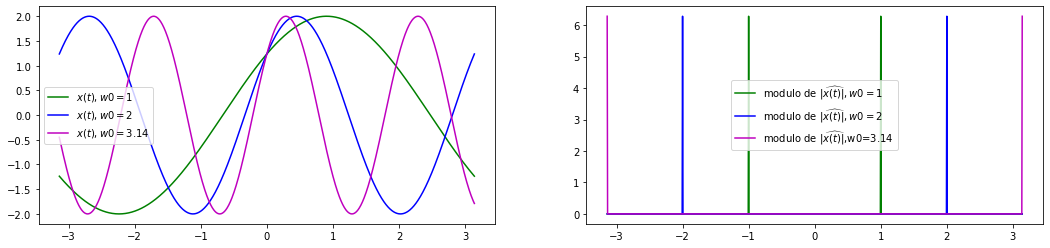

In [11]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x=[]
xhatmod=[]
for w0 in [1,2,3.14]:
    n_w0 = int((np.pi+w0) * N/(2*np.pi))
    minus_n_w0 = int((np.pi-w0) * N/(2*np.pi))
    señal = 2*np.sin(w0*t+2/3)
    tf_señal =2*np.pi*abs(signal.unit_impulse(N, minus_n_w0) - signal.unit_impulse(N,n_w0))
    np.array(x.append(señal))
    np.array(xhatmod.append(tf_señal))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x[0], 'g-',  label='$x(t), w0=1$')
o2 = ax[1].plot(w, xhatmod[0], 'g-', label='modulo de $|\widehat{x(t)}|,w0=1$')

o3 = ax[0].plot(t, x[1], 'b-',  label='$x(t), w0=2$')
o4 = ax[1].plot(w, xhatmod[1], 'b-', label='modulo de $|\widehat{x(t)}|,w0=2$')

o5 = ax[0].plot(t, x[2], 'm-',  label='$x(t), w0=3.14$')
o6 = ax[1].plot(w, xhatmod[2], 'm-', label='modulo de $|\widehat{x(t)}|$,w0=3.14')


ax[0].legend()
ax[1].legend();
    


**3.-** $x(t)=2\cos(\omega_0t)+\sin(\omega_0t)$

Ocupando que $\widehat{f'}(\omega) = 2\pi i \omega \widehat{f}(\omega)$ junto con el inciso **1** se obtiene

\begin{align*}
\mathscr{F}\{x(t)\}(\omega) &= \mathscr{F}\{2\cos(\omega_0t)+\sin(\omega_0t) \}(\omega)\\
&= \frac{2}{\omega_0}\mathscr{F}\{\sin(\omega_0t)'\}(\omega)+\mathscr{F}\{\sin(\omega_0t) \}(\omega)\\
&= \frac{2}{\omega_0}\cdot 2\pi i\omega \mathscr{F}\{\sin(\omega_0t)\}(\omega)+\mathscr{F}\{\sin(\omega_0t) \}(\omega)\\
&= \left(\frac{4\pi i \omega}{\omega_0} \cdot \frac{\pi}{i}+\frac{pi}{i} \right) \left[\delta (\omega + \omega_0) -\delta (\omega - \omega_0)\right]\\
&= \frac{\pi(4\omega i+\pi \omega_0)}{w_0i} \left[\delta (\omega + \omega_0) -\delta (\omega - \omega_0)\right]
\end{align*}

Entonces

$$|\hat{x}(\omega)|=\pi \sqrt{\frac{(4\omega)^2 + (\omega_0\pi)^2}{\omega_0^2}}\left|\delta(\omega+\omega_0)-\delta(\omega-\omega_0)\right|$$


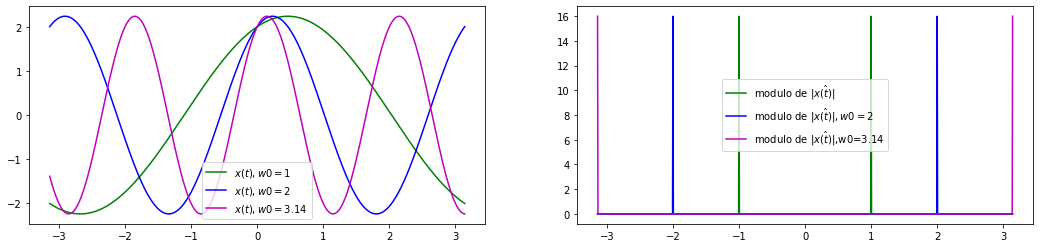

In [6]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x=[]
xhatmod=[]
for w0 in [1,2,3.14]:
    n_w0 = int((np.pi+w0) * N/(2*np.pi))
    minus_n_w0 = int((np.pi-w0) * N/(2*np.pi))
    señal = 2*np.cos(w0*t)+np.sin(w0*t)
    tf_señal =(np.pi*np.sqrt(((4*w)**2+(np.pi*w0)**2))/w0)*abs(signal.unit_impulse(N, minus_n_w0) - signal.unit_impulse(N,n_w0))
    np.array(x.append(señal))
    np.array(xhatmod.append(tf_señal))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x[0], 'g-',  label='$x(t), w0=1$')
o2 = ax[1].plot(w, xhatmod[0], 'g-', label='modulo de $|\hat{x(t)}|$')

o3 = ax[0].plot(t, x[1], 'b-',  label='$x(t), w0=2$')
o4 = ax[1].plot(w, xhatmod[1], 'b-', label='modulo de $|\hat{x(t)}|,w0=2$')

o5 = ax[0].plot(t, x[2], 'm-',  label='$x(t), w0=3.14$')
o6 = ax[1].plot(w, xhatmod[2], 'm-', label='modulo de $|\hat{x(t)}|$,w0=3.14')


ax[0].legend()
ax[1].legend();
    

**4.** $x(t)=1$

Notamos que $x(t)=1= e^{i\cdot 0 \cdot t}$, luego de manera directa su transformada de Fourier es

$$\hat{x}(\omega)=2\pi\delta(\omega)$$
Entonces

$$|\hat{x}(\omega)|=2\pi\delta(\omega)$$


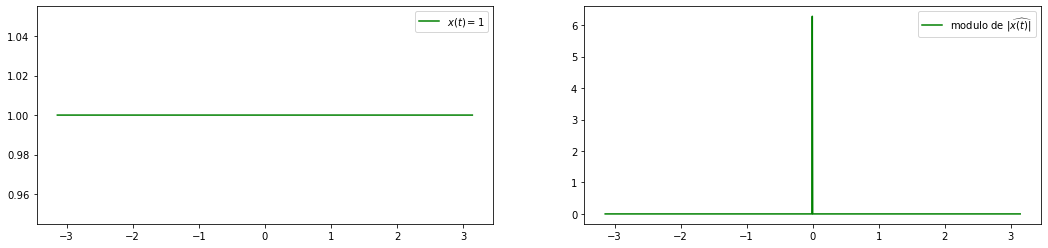

In [9]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x=t**0
xhatmod = 2*np.pi*signal.unit_impulse(N,int(N/2)-1)

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'g-',  label='$x(t)=1$')
o2 = ax[1].plot(w, xhatmod, 'g-', label='modulo de $|\widehat{x(t)}|$')
ax[0].legend()
ax[1].legend();



# Ejercicio 2 - Cálculo de la Transformada de Fourier

Para las siguientes señales, grafique la señal, calcule la transformada de fourier de las siguientes señales y grafique su modulo. Cuando sea posible intente no calcular directamente la transformada.

1. $x(t) = e^{-at}\gamma (t)$ con $a>0$
2. $x(t) = e^{-a|t|}$ con $a>0$
3. $x(t) = \frac{1}{1+t^2}$
4. $x(t) = \frac{1}{2-2t+t^2}$
5. $x(t) = \frac{1}{(1+t^2)^2}$

En donde $\gamma (t)$ se corresponde con la función de Heaviside, definida por

 $$ \gamma (t) = \left \{
    \begin{aligned}
      1 &,\ \text{si} \ t > 0\\
      \frac{1}{2} &,\ \text{si} \ t=0 \\
      0 &,\ \text{otro caso} \
    \end{aligned}
  \right .$$


*Solución:*

**1.-** $x(t) = e^{-at}\gamma (t)$ con $a>0$

Calculamos la Transformada de Fourier

\begin{align*}
\hat{x}(t) &= \int_{\mathbb{R}}e^{-at}\gamma(t)e^{-i\omega t} dt\\
&=\int_0^{+\infty} e^{-(a+i\omega)} dt\\
&= \left[ \frac{e^{-(a+iw)t}}{-(a+iw)}\right]_0^{+\infty}\\
&= \frac{1}{a+i\omega}
\end{align*}

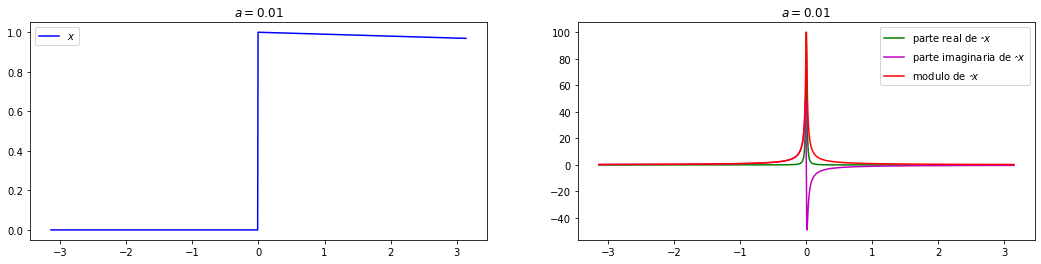

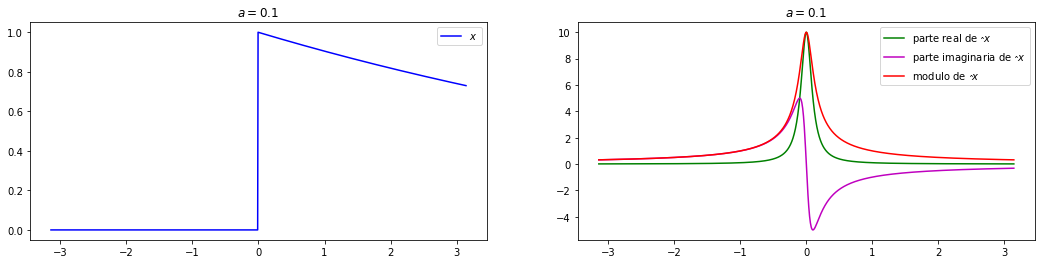

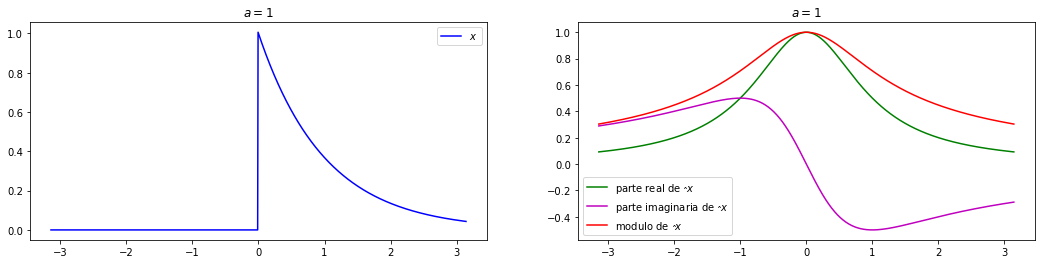

In [16]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

for a in [.01,.1,1]:
    
    x = np.exp(-a*t)
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*w)
    
    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x(t)$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\widehat{x}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\widehat{x}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\widehat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')
    


**2.-** $x(t) = e^{-a|t|}$ con $a>0$

Calculamos su Transformada de Fourier

\begin{align*}
    \hat{x}(t)&=\int_{\mathbb{R}} e^{-|t|} e^{-i\omega t} dt\\
&= \int_{-\infty}^0 e^{(a-i\omega)t} dt + \int_0^{+\infty} e^{-(a+i\omega)t} dt\\
&= \left[\frac{e^{(a-i\omega)t}}{a-i\omega} \right]_{-\infty}^0 + \frac{1}{a+i\omega}\\
&= \frac{1}{a-i\omega}+ \frac{1}{a+i\omega}\\
&= \frac{2a}{a^2+\omega^2}
\end{align*}


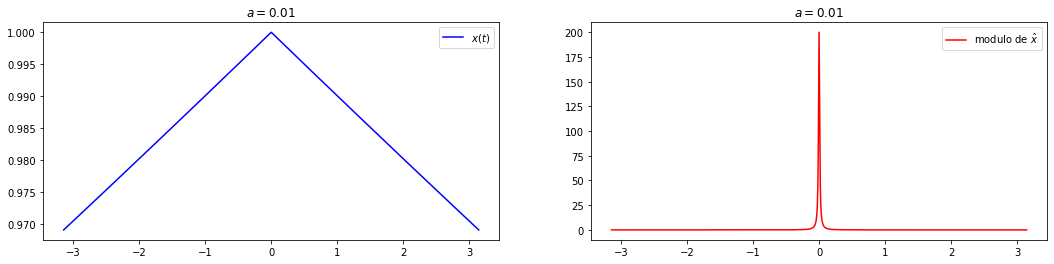

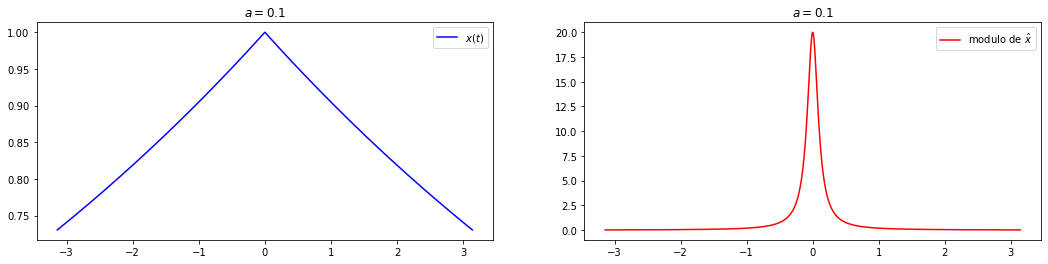

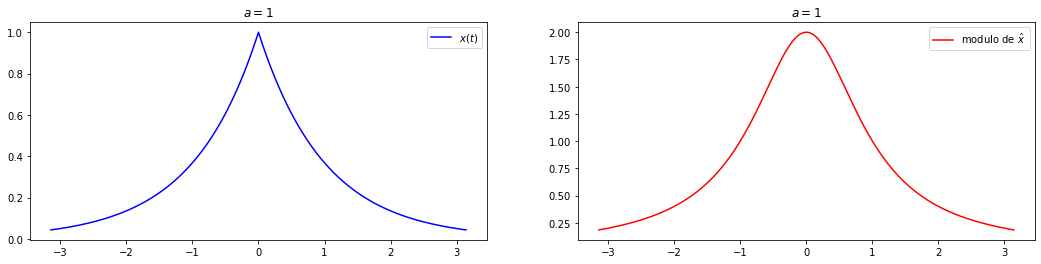

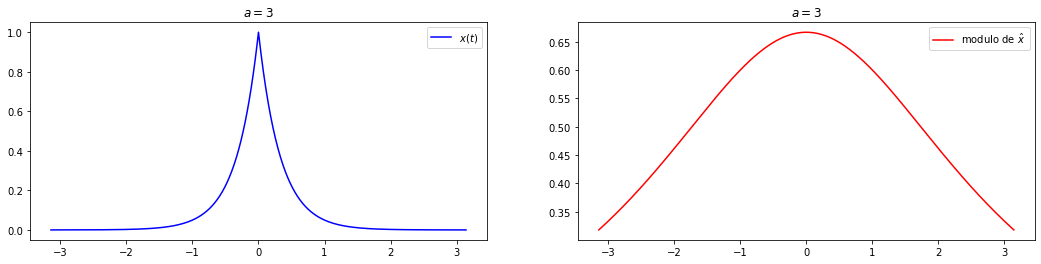

In [3]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

for a in [.01,.1,1,3]:
    
    x = np.exp(-a*np.abs(t))
    xhat = (2*a)/(a**2+w**2)
    
    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x(t)$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\widehat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

**3.-** $x(t) = \frac{1}{1+t^2}$

\begin{align*}
\mathscr{F}\{x(t)\}(\omega) &= \mathscr{F}\left\{\frac{2}{1+t^2} \cdot \frac{1}{2}\right\}(\omega)\\
&= \frac{1}{2}  \mathscr{F}\left\{ \frac{2}{1+t^2}\right\}(\omega)\\
&= \frac{1}{2}  \mathscr{F}\left\{\mathscr{F}\left\{e^{-|x|}\right\}(t)\right\} (\omega)
\end{align*}

Usando la dualidad de la Transformada de Fourier $\left(\mathscr{F}\left\{\mathscr{F}\left[e^{-|x|}\right](t)\right\} = 2\pi e^{-|\omega|}\right)$

$$\mathscr{F}\{x(t)\}(\omega)=\pi e^{-|\omega|}$$.



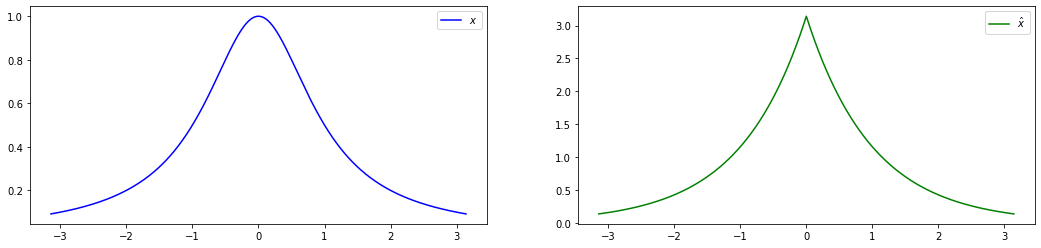

In [18]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x = 1/(1+t**2)
xhat = np.pi*np.exp(-np.abs(w))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x(t)$')
o2 = ax[1].plot(w, xhat, 'g-', label='$\widehat{x}$')
ax[0].legend()
ax[1].legend();

**4.-** $x(t) = \frac{1}{2-2t+t^2}$

Notamos que $\frac{1}{2-2t+t^2} = \frac{1}{1+(t-1)^2}$. 
Luego aplicando lo obtenido en el ejercicio **3.-** se tiene

$$\hat{x}(t)= \pi e^{-|\omega-1|}$$

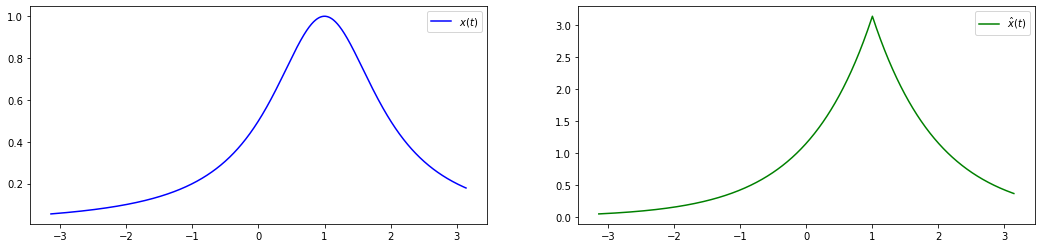

In [19]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x = 1/(1+(t-1)**2)
xhat = np.pi*np.exp(-np.abs(w-1))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x(t)$')
o2 = ax[1].plot(w, xhat, 'g-', label='$\widehat{x}$')
ax[0].legend()
ax[1].legend();

**5.-** $x(t) = \frac{1}{(1+t^2)^2}$

Notamos que 
$$ x(t)=\frac{1}{(1+t^2)^2} = \frac{1}{1+2t^2+t^4}=\frac{1}{2}\frac{2}{1+\left(t\sqrt{t^2+2}\right)^2}$$

Luego usando los incisos anteriores se obtiene
$$\hat{x}(t)=\pi e^{-|\omega\sqrt{\omega^2+2}|}$$


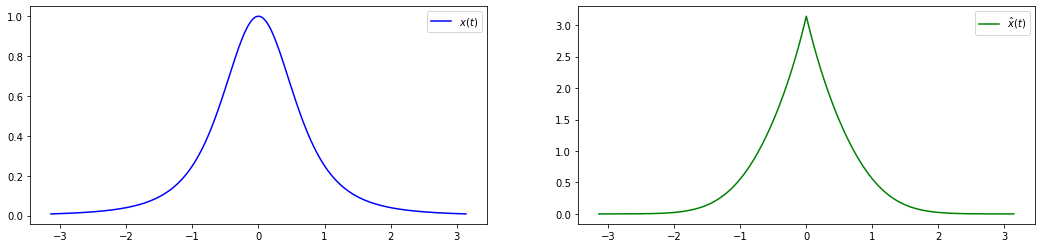

In [20]:
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi, np.pi, N)
w=np.copy(t)

x = 1/((t**2+1)**2)
xhat = np.pi*np.exp(-np.abs(w*np.sqrt(w**2+2)))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x(t)$')
o2 = ax[1].plot(w, xhat, 'g-', label='$\widehat{x}$')
ax[0].legend()
ax[1].legend();

# Ejercicio 3  - Filtro Medio 

El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$.
Su respuesta impulsional es la función rectangular definida por:

$$h(t) = \Pi _{T}(t-T/2)$$

donde 
$$\Pi_{T}(t)=\begin{cases}
 \frac{1}{T} &,\ \text{si} \ |t| < \frac{T}{2}\\
      \frac{1}{2T} &,\ \text{si} \ |t|=\frac{T}{2} \\
      0 &,\ \text{otro caso}
\end{cases}$$

**1.-** Grafique la respuesta impulsional y determine si es causal.

*Solución:*

La respuesta impulsional queda definida por

$$h(t) = \Pi _{T}(t-T/2) = \begin{cases}
                           \frac{1}{T} &,\ \text{si} \ 0<t<T\\
                           \frac{1}{2T} &,\ \text{si} \ t=0 \text{ o } t=T \\
                            0 &,\ \text{otro caso}
                           \end{cases}$$
                           
Lo cual nos entrega que que es causal y su gráfica será                         

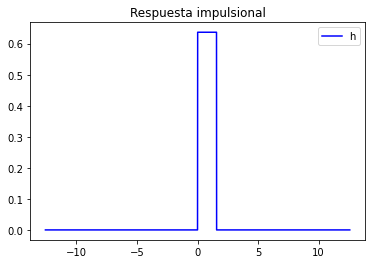

In [21]:
N = 8*2**10 + 1 # 1025 puntos
L = 4*np.pi #Para graficar entre [-4pi,4pi]

t = np.linspace(-L, L, N)
T = np.pi/2 #Definimos T=pi/2


n_zero = int(N/2)-1 #Posición del 0
n_T = n_zero + int(T * N/(2*L)) #Posición T

h = np.zeros_like(t)
#definimos la función por partes
h[n_zero+1:n_T-1] = 1/T  
h[n_zero] = 1/(2*T)
h[n_T]=1/(2*T)

plt.plot(t,h,'b-',label = 'h')
plt.legend()
plt.title('Respuesta impulsional');



**2.-** Calcule la salida del sistema lineal correspondiente, cuando la entrada es:

   **a)** x(t)=1
   
   **b)** x(t)=$\gamma$(t)
   
   **c)** x(t)= $\cos (\omega_0t)$

*Solución:*

Calculamos la salida usando la convolución de la señal con la repsuesta impulsional 

**a)**
\begin{align*}
L[1](t) &= \int_{-\infty}^{+\infty} 1\cdot h(u)du\\
&= \int_0^{T} \frac{1}{T}du\\
&= 1
\end{align*}

**b)**
\begin{align*}
L[\gamma](t) &= \int_{-\infty}^{+\infty} \gamma(t-u) h(u)du\\
&= \int_0^{T} 1\cdot \frac{1}{T}du\\
&= 1
\end{align*}

**c)**
\begin{align*}
L[\cos(\omega_0 t)](t)&=\int_{-\infty}^{+\infty} \cos(\omega_0(t-u))h(u)du\\
&= \frac{1}{T} \int_0^T \cos(\omega_0(t-u))du\\
\text{Realizando el cambio } z=\omega_0 (t-u):\\
&= -\frac{1}{\omega_0 T} \int_{\omega_0t}^{\omega_0(t-T)} \cos(z)dz\\
&=\frac{1}{\omega_0 T}\left[\sin(\omega_0t)-\sin(\omega_0(t-T)) \right]
\end{align*}


**3.-** Exprese la salida del sistema para $x(t) = \cos(\omega_0t)$ de la forma $y(t) = A(\omega_0) \cos(\omega_0t + \phi(\omega_0))$.

*Solución:*

Trabajamos con propiedades trigonométricas el resultado obtenido en el inciso anterior

\begin{align*}
\frac{1}{\omega_0 T}\left[\sin(\omega_0t)-\sin(\omega_0(t-T)) \right] &= \frac{1}{\omega_0T}\cdot 2\cos\left(\frac{\omega_0t+\omega_0(t-T)}{2}\right)\cdot\sin\left(\frac{\omega_0t-\omega_0(t-T)}{2}\right)\\
&= \frac{2}{\omega_0T}\cdot \sin\left(\frac{\omega_0T}{2}\right)\cos\left(t\omega_0-\frac{\omega_0T}{2}\right)\\
&= A(\omega_0)\cdot \cos\left(\omega_0 t + \phi(\omega_0)\right)
\end{align*}

donde $A(\omega_0) = sinc\left(\frac{\omega_0 T}{2}\right)$ y $\phi(\omega_0)=-\frac{\omega_0T}{2}$

**4.-** Grafique $|A(ω_0)|$ en funcion de $\omega_0$ para $T = 1$. Grafique tambien $\phi(\omega_0)$.

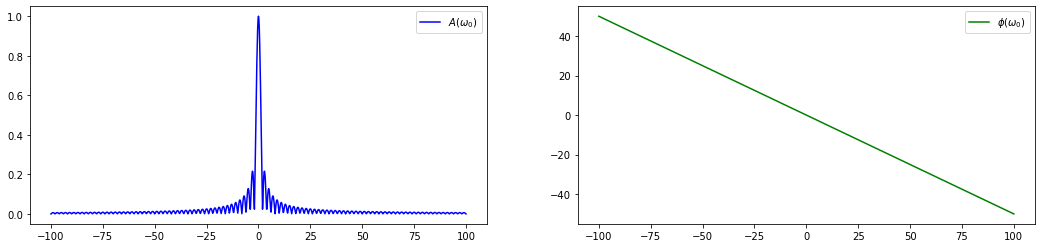

In [22]:
T=1
N = 2**10 + 1 # 1025
t = np.linspace(-100, 100, N)
w0=np.copy(t)
x = 1/(1+(t-1)**2) #función
xhat = np.pi*np.exp(-np.abs(w-1)) 

A= np.sinc(w0*T/2)
phi = -w0*T/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(w0,np.abs(A),'b-',label = '$A(\omega_0)$')
o2 = ax[1].plot(w0, phi, 'g-', label='$\phi(\omega_0)$')
ax[0].legend()
ax[1].legend();

**5.-** Calcule la función de transferencia del sistema $H(\omega)$. Cual es la relación con $A(\omega)$ y $\phi(\omega)$ ?

*Solución:*

Calculamos la Transformada de Fourier de la respuesta impulsional para obtener la función de transferencia

\begin{align*}
H(\omega)&=\mathscr{F}\{h(t)\}(\omega)\\
&= \int_0^T\frac{1}{T}\cdot e^{-i\omega t} dt\\
&= \frac{1}{T} \int_0^T e^{-i\omega t} dt\\
&= \frac{1}{T} \frac{1}{-i\omega} \left[e^{-i\omega t}\right]_0^T\\
&=\frac{1}{i\omega T} \left( 1-e^{-i\omega T}\right)\\
&=\frac{1}{i\omega T} \left(1-\cos(\omega T)+ i\sin(\omega T)\right)\\
&= \frac{1-cos(\omega T)}{i\omega T} + sinc(\omega T)\\
&= -\frac{2i\sin\left( \frac{\omega T}{2} \right)}{\omega T} + sin(\omega T)\\
&= sinc(\omega T)-isinc\left(\frac{\omega T}{2}\right)
\end{align*}

Por lo tanto 
$$H(\omega)=sinc(\omega T)-isinc\left(\frac{\omega T}{2}\right)$$

Con respecto a la relación que se tiene con $A$ y $\phi$ notamos que 

\begin{align*}
H(\omega)&=sinc(\omega T)-isinc\left(\frac{\omega T}{2}\right)\\
&= A(2\omega)-iA(\omega)\\
&= sinc(\phi(-2\omega))-i sinc(\phi(-\omega))
\end{align*}


# Ejercicicio 4 - Bode Plot

Un diagrama de Bode es una representacion grafica que sirve para caracterizar la funcion de transferencia $H$
de un sistema. Escribiendo la funcion de transferencia compleja como

$$H(w) = |H(\omega)|e^{i \arg(H(\omega))} $$

el diagrama consta de dos gráficas separadas de ordenadas en escala logarítmica de $\omega$  expresada en radianes por segundo $(rad/s)$ y de ordenadas:

* Magnitud (o ganancia) en decibeles (dB)

  $$G(\omega)=20 \log_{10} (|H(\omega)|)$$ 

* Fase en grados

  $$\Phi(\omega) = \arg(H(\omega)) = \tan^{-1} \left(\frac{Im(H(\omega))}{Re(H(\omega))}\right)$$
  
**1.-** Pruebe que si dos filtros $H_1(\omega)$  y $H_2(\omega)$ se encuentran conectados en serie (i.e, actúan uno después del otro sobre las señales entrantes), entonces el sistema es equivalente a

$$H(\omega) = H_1(\omega) \cdot H_2 (\omega)$$

y entonces se tiene que

\begin{eqnarray*}
G(\omega) = G_1 (\omega) + G_2 (\omega)\\
\Phi (\omega)  = \Phi _1 (\omega) + \Phi _2 (\omega)
\end{eqnarray*}

*Solución:*

Sean $h_1$ y $h_2$ las respuestas impulsionales de $H_1$ y $H_2$ respectivamente. Consideremos $f\in \mathcal{L}^2(\mathbb{R})$ una señal y supongamos que el filtro $H_2$ actúa seguidamente del filtro $H_1$ en la señal $f$.

Trabajando en el lado espectral se tendría

\begin{align*}
\widehat{L(f)}(\omega) &= \widehat{h*f}(\omega)\\
&= \widehat{h_2*(h_1*f)}(\omega)\\
&= \widehat{h_2}(\omega) \cdot \widehat{h_1}(\omega) \cdot\widehat{f}(\omega)\\
&= H_2 \cdot H_1 \cdot \widehat{f}(\omega)
\end{align*}

Por lo tanto el aplicar ambos filtros en serie es equivalente a que la función de transferencia sea escrita por 

$$H(\omega) = H_1(\omega) \cdot H_2 (\omega)$$

Por otro lado, de manera directa
\begin{align*}
G(\omega)&=20\log\left(|H_1(\omega)||H_2(\omega)| \right)\\
&=20 \log\left(|H_1(\omega)|\right)+20\log\left(|H_2(\omega)|\right)\\
&= G_1(\omega) + G_2(\omega)
\end{align*}

Para mostrar la siguiente propiedad consideremos $|H_i(\omega)|=r_i$ y $\arg (H_i(\omega)) = \phi_i$, $i=1,2$

Entonces
\begin{align*}
H_1(\omega)&=|H_1(\omega)|e^{i\arg(H_1(\omega))}\\
&= r_1[\cos(\phi_1)+i\sin(\phi_1)]\\
H_2(\omega)&=|H_2(\omega)|e^{i\arg(H_2(\omega))}\\
&= r_2[\cos(\phi_2)+i\sin(\phi_2]
\end{align*}

Luego 
\begin{align*}
H_1(\omega)\cdot H_2(\omega) &= r_1r_2[\cos(\phi_1)+i\sin(\phi_1)][\cos(\phi_2)+i\sin(\phi_2)]\\
&=r_1r_2[\cos(\phi_1)\cos(\phi_2)+i(\cos(\phi_1)\sin(\phi_2)+\sin(\phi_1)\cos(\phi_2))-\sin(\phi_1)\sin(\phi_2)]\\
&= r_1r_2[\cos(\phi_1+\phi_2)+i\sin(\phi_1+\phi_2)]
\end{align*}

Entonces 
\begin{align*}
\Phi(H(\omega))&= \Phi(H_1(\omega)\cdot H_2(\omega))\\
&=\arg((H_1(\omega)\cdot H_2(\omega))\\
&= \phi_1+\phi_2\\
&= \Phi_1(\omega)+\Phi_2(\omega)
\end{align*}

**2.-** Pruebe de la misma manera, que si $H(\omega)=H_1(\omega)/H_2(\omega)$, entonces se tiene que 

\begin{align*}
G(\omega) = G_1(\omega) -G_2(\omega)\\
\Phi (\omega) = \Phi_1 (\omega) - \Phi_2 (\omega)
\end{align*}

e indique para qué tipo de sistema visto en clases esto es particularmente útil.

*Solución:*

De manera directa

\begin{align*}
G(\omega)&=20\log(\frac{H_1(\omega)}{H_2(\omega)})\\
&= 20\log(H_1(\omega))-20\log(H_2(\omega))\\
&= G_1(\omega)-G_2(\omega)
\end{align*}

Por otro lado 

\begin{align*}
\frac{H_1(\omega)}{H_2(\omega)} &= \frac{r_1}{r_2} \cdot\frac{\cos(\phi_1)+i\sin(\phi_1)}{\cos(\phi_2)+i\sin(\phi_2)} \cdot \frac{\cos(\phi_2)-i\sin(\phi_2)}{\cos(\phi_2)-i\sin(\phi_2)}\\
&= \frac{r_1}{r_2} \cdot\frac{\cos(\phi_1)\cos(\phi_2)+\sin(\phi_1)\sin(\phi_2)+i(\sin(\phi_1)\cos(\phi_2)-\cos(\phi_1)\sin(\phi_2))}{\cos^2(\phi_2)+\sin^2(\phi_2)}\\
&= \frac{r_1}{r_2} [\cos(\phi_1-\phi_2)+i\sin(\phi_1-\phi_2)]
\end{align*}

Entonces
\begin{align*}
\Phi (\omega) &= \arg(H(\omega)\\
&= \arg\left(\frac{H_1(\omega)}{ H_2(\omega)}\right)\\
&= \phi_1 - \phi_2\\
&= \Phi_1(\omega)-\Phi_2(\omega)
\end{align*}


Este modelo podría ser aplicado en circuítos eléctricos donde los filtros podrían representar resistencias.

## 4b - Respuesta frecuencial de sistemas eléctricos

**1.-** Para el sistema electrico dado en la Figura 2, calcule la funcion transferencia del sistema en funcion de
   $\omega_0 = 1/RC$ donde $R$ es el del valor de la resistencia $C$ el valor del capacitador $C$.
 
*Solución:*

La salida $y(t)$ del sistema en función de la entrada $x(t)$ esta dada por la ecuación diferencial:

$$ x(t)=RC y'(t) + y(t)$$

donde $y(t)=y(t) = \frac{1}{C}\displaystyle\int_{-\infty}^{t}i(v)dv$ y  $x(t) = Ri(t) + y(t)$

Aplicamos la Transformada de Fourier a la Edo para obtener su función de Transferencia

\begin{align*}
\widehat{x(t)}&=RC\widehat{y'(t)}+\widehat{y(t)}\\
&= i\omega RC \widehat{y(t)}+\widehat{y(t)}\\
&=\widehat{y(t)}(i\omega RC + 1)
\end{align*}

\begin{align*}
\Longrightarrow H(\omega)=\frac{Y(\omega)}{X(\omega)}=\frac{\widehat{y(t)}}{\widehat{x(t)}} &= \frac{1}{1+ i\omega RC} =  \frac{1}{1+i\frac{\omega}{\omega_0}}
\end{align*}

donde $\omega_0=1/RC$ es llamada **frecuencia de corte**

**2.-** Grafique el diagrama de Bode del sistema eléctrico de Figura 1 y discuta sobre el tipo filtro implementado
(low-pass, high-pass, etc.).

Notamos que el filtro implementado es uno tipo Band-pass dado que en el gráfico de la Magnitud del Diagrama de Bode se muestra que cercano a la frecuencia de corte, el filtro deja pasar frecuencias.


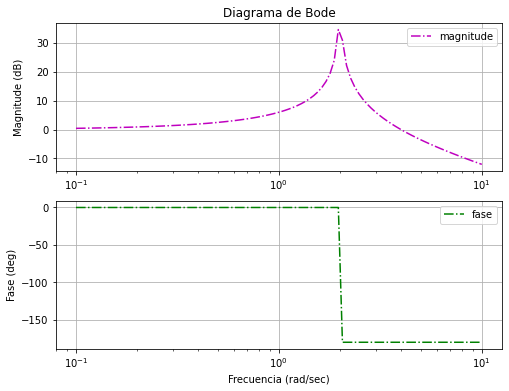

In [12]:
#Le entregamos valores a R y C
R=1
C=2
w0 = 1/R*C

sys = signal.TransferFunction([1],[1j/w0,1]) #Función de transferencia
w, mag, phase = signal.bode(sys)

fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].semilogx(w, mag, 'm-.',  label='magnitude')
ax[1].semilogx(w, phase, 'g-.',  label='fase')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].set_ylabel('Magnitude (dB)')
ax[0].grid()
ax[1].legend()
ax[1].set_ylabel('Fase (deg)')
ax[1].set_xlabel('Frecuencia (rad/sec)')
ax[1].grid()
print('Notamos que el filtro implementado es uno tipo Band-pass dado que en el gráfico de la Magnitud del Diagrama de Bode se muestra que cercano a la frecuencia de corte, el filtro deja pasar frecuencias.')

**3.-** Para el sistema eléctrico dados en la Figura 3, calcule la función transferencia del sistema en función de la frecuencia natural del sistema $\omega_n=1/\sqrt{LC}$ y del amortiguamiento $z = R/2\cdot\sqrt{C/L}$ donde $L$ es el del valor de la inductancia.


*Solución:*

La ecuación para el sistema eléctrico de la Fig. 3 es

$$k\omega_n^2x(t) = \frac{d^2 y(t)}{dt^2}+2z\omega_n \frac{dy(t)}{dt}+\omega_n^2 y(t) $$

Nuevamente aplicamos la Transformada de Fourier para encontrar la función de Transferencia

\begin{align*}
k\omega^2_n \widehat{x(t)} &=  \widehat{y''(t)}+ 2z\omega_n \widehat{y'(t)}+\omega_n^2\widehat{y(t)}\\
&=-\omega^2 \widehat{y(t)} +2zi\omega_n\omega\widehat{y(t)} + \omega_n^2\widehat{y(t)}\\
&= \widehat{y(t)}(\omega_n^2+2zi\omega_n\omega-\omega^2)
\end{align*}

\begin{align*}
\Longrightarrow H(\omega)=\frac{Y(\omega)}{X(\omega)}=\frac{\widehat{y(t)}}{\widehat{x(t)}} &= \frac{k\omega_n^2}{\omega_n^2+2zi\omega_n\omega-\omega^2}
\end{align*}

**4.-** Grafique el diagrama de Bode del sistema eléctrico de Figura 2 para $z = 0.5, 1, 1.5$ y discuta sobre el tipo
filtro implementado (low-pass, high-pass, etc.).

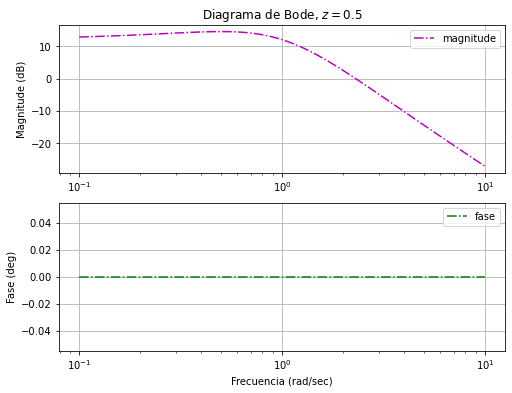

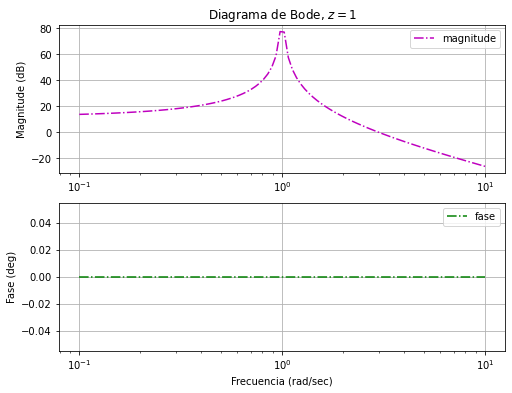

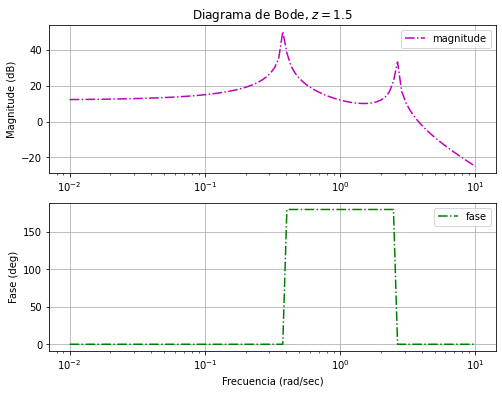

In [14]:
w_n=1
k=4

for z in [0.5,1,1.5]:
    
    sys = signal.TransferFunction([k*w_n**2],[-1,2*z*1j*w_n,w_n**2]) #Función de transferencia
    w, mag, phase = signal.bode(sys)


    fig, ax = plt.subplots(2, 1,figsize=(8,6))
    ax[0].semilogx(w, mag, 'm-.',  label='magnitude')
    ax[1].semilogx(w, phase, 'g-.',  label='fase')
    ax[0].set_title(f'Diagrama de Bode, $z= {z} $')
    ax[0].legend()
    ax[0].set_ylabel('Magnitude (dB)')
    ax[0].grid()
    ax[1].legend()
    ax[1].set_ylabel('Fase (deg)')
    ax[1].set_xlabel('Frecuencia (rad/sec)')
    ax[1].grid()

Notamos que para distintos valores de $z$ hay distintos tipos de filtros.

* Para $z=0.5$ se tiene un filtro Low-Pass dado que a partir de la frecuencia de corte, atenúa las frecuencias que siguen.

* Para $z=1$ se tiene un filtro Band-Pass ya que se permiten pasar las frecuencias en un entorno cercano a la frecuencia de corte.

* Por último para $z=1.5$ el filtro en cuestión puede ser interpretado como 2 filtros Band-Pass actuando, dado que en la frecuencia de corte y otra frecuencia establecida, se dejan pasar frecuencias en los entornos cercanos.

# Ejercicio 5- Diseño de Filtros

La función de transferencia de un filtlro de Burrerworth de orden $n$ satisface:

$$|H(\omega)|^2 = \frac{1}{1+\left(\frac{\omega}{\omega_c}\right)^{2n}}$$

donde $\omega_c$ es la frecuencia de corte del filtro.

**1.-** Grafique la primera parte (magnitud) del Diagrama de Boid para diferentes valores de $n$.



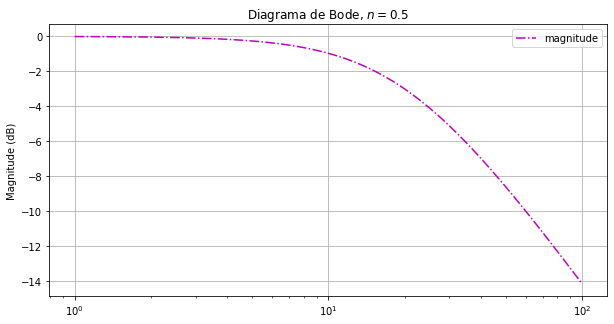

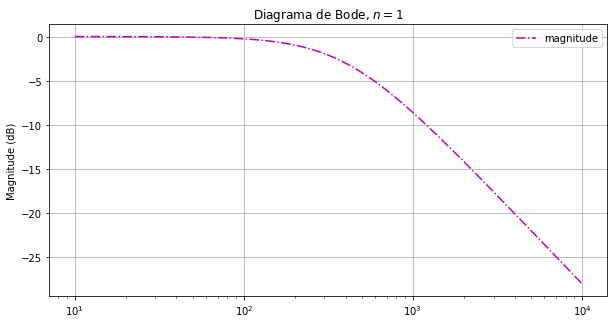

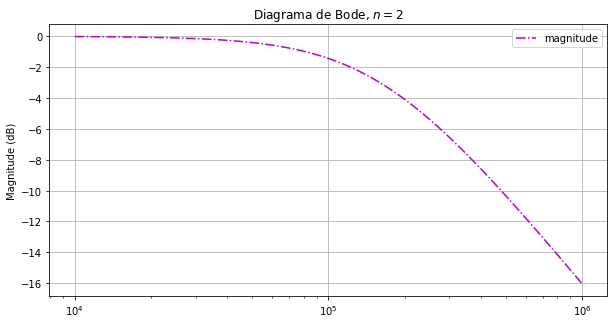

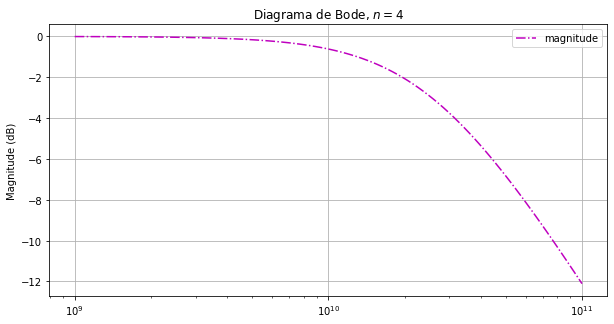

In [28]:
w_c=20

for n in [0.5,1,2,4,]:
    
    sys = signal.TransferFunction([1],[(1/w_c)**(2*n),1]) #Función de transferencia
    w, mag, phase = signal.bode(sys)

    fig,ax  = plt.subplots(1, 1,figsize=(10,5))
    ax.semilogx(w, mag, 'm-.',  label='magnitude')
    ax.set_title(f'Diagrama de Bode, $n= {n} $')
    ax.legend()
    ax.set_ylabel('Magnitude (dB)')
    ax.grid()
    

**2.-** Nuestro objetivo es diseñar un filtro que respete las restricciones graficadas en la Figura 4.
Usando la expresión del función de transferencias, calcule el mínimo orden del filtro (en función de
$\omega_c, \omega_a$ y $a$) para que que las restricciones sean respetadas.